In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
sns.set()

# Data Manipulation
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ANN Modeling in TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers.legacy import Nadam  # Use legacy optimizer for M1/M2 Macs

# Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


#import data
data = pd.read_csv("https://www.dropbox.com/scl/fi/3obtlhrdde8zw8ebqrnd9/Concrete_Data.csv?rlkey=np2bb07jugsg9fqij7mfrpnmb&st=7jfssh3u&dl=1")
display(data.head())

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
# Checking for missing values and the data types of each column
missing_values = data.isnull().sum()
data_types = data.dtypes

print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

# Checking the column names and general information of the dataset
print("\nColumn Names:\n", data.columns)
print("\nDataset Info:")
data.info()


Missing Values:
 Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

Data Types:
 Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_compressive_strength    float64
dtype: object

Column Names:
 Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFra

In [3]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


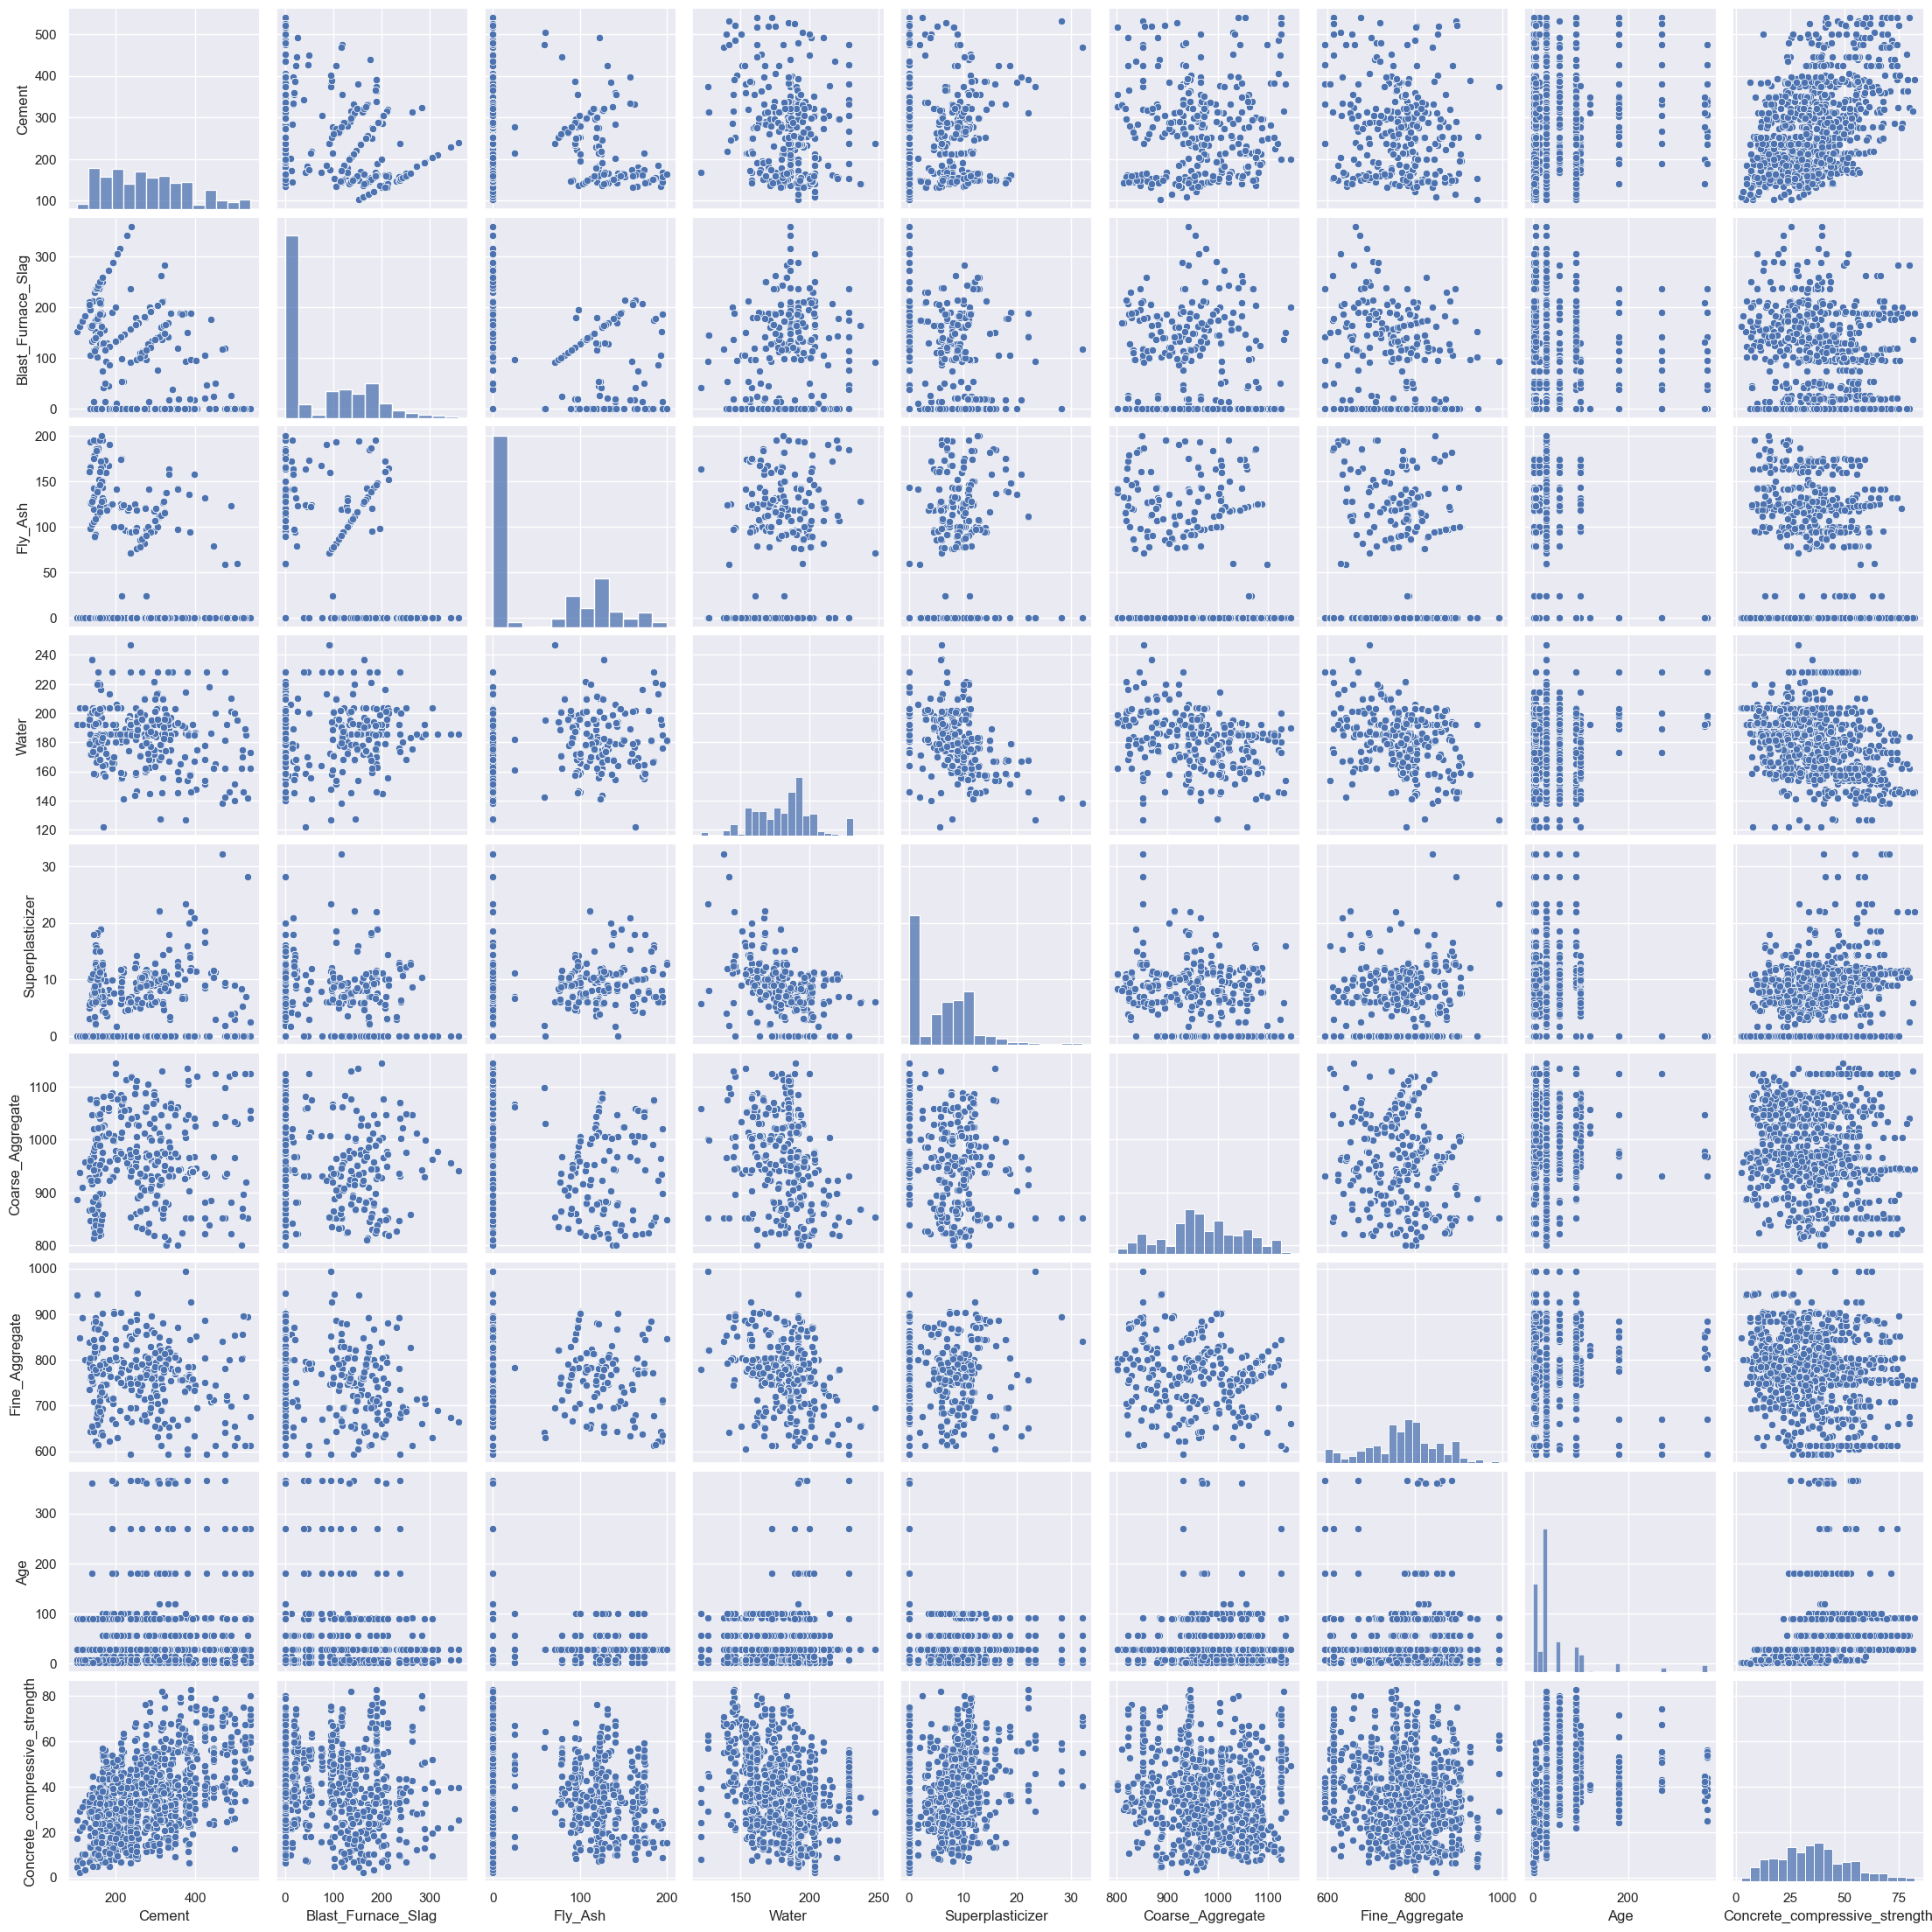

In [4]:
sns.pairplot(data)

In [5]:

concrete_data = data.copy()
concrete_data.head()


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


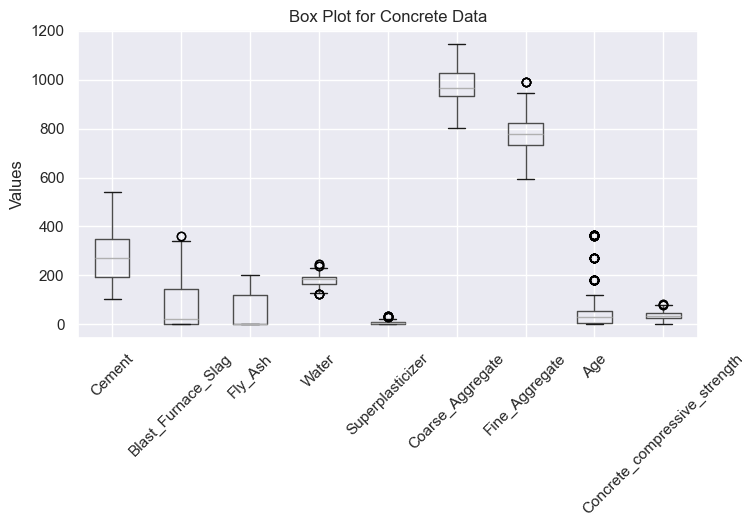

In [6]:
# Plot boxplot 
plt.figure(figsize=(8, 4))
concrete_data.boxplot()
plt.title("Box Plot for Concrete Data")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

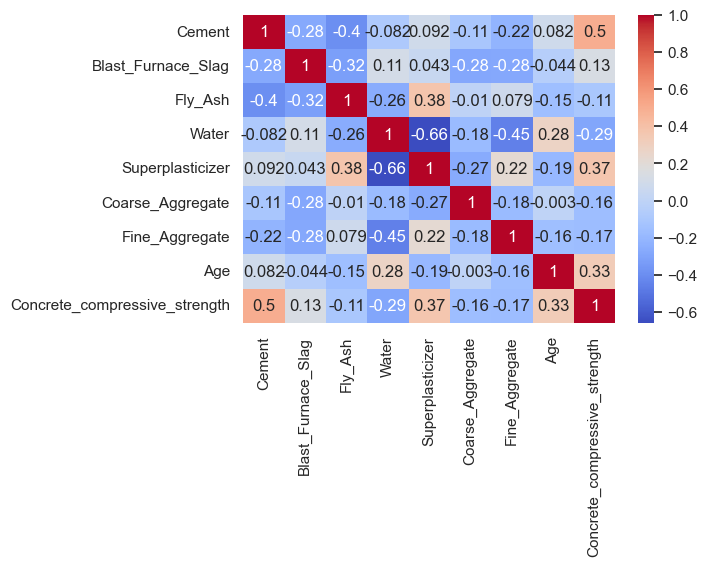

In [7]:

# Correlation matrix
corr = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [8]:
#Train Test Split
X = concrete_data.drop('Concrete_compressive_strength',axis=1)
y = concrete_data['Concrete_compressive_strength']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# Display the shapes of the datasets
print("Shapes of the datasets:")
print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}, y_test: {len(y_test)}")

Shapes of the datasets:
X_train: 824, X_test: 206
y_train: 824, y_test: 206


In [11]:
#Scale the Data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display a few examples from the datasets
print("\nSample data from X_train and y_train:")
print(f"X_train (first 5 rows): \n{X_train[:5]}")
print(f"y_train (first 5 rows): \n{y_train[:5]}\n")

# Display a few examples from the datasets
print("\nSample data from X_test and y_test:")
print(f"X_test (first 5 rows): \n{X_test[:5]}")
print(f"y_test (first 5 rows): \n{y_test[:5]}\n")



Sample data from X_train and y_train:
X_train (first 5 rows): 
[[0.12922374 0.41430161 0.59487179 0.42571885 0.46583851 0.44273256
  0.31535374 0.07417582]
 [0.73515982 0.06121313 0.67692308 0.44888179 0.26397516 0.06104651
  0.39136979 0.07417582]
 [0.39520548 0.         0.6225641  0.30111821 0.30745342 0.73430233
  0.46036126 0.00549451]
 [0.34246575 0.26989427 0.38974359 0.57667732 0.2484472  0.09883721
  0.56949323 0.07417582]
 [0.15273973 0.11741792 0.6374359  0.29153355 0.33540373 0.81337209
  0.50727546 0.00549451]]
y_train (first 5 rows): 
995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
Name: Concrete_compressive_strength, dtype: float64


Sample data from X_test and y_test:
X_test (first 5 rows): 
[[0.37442922 0.31719533 0.         0.84824281 0.         0.38081395
  0.19066734 1.        ]
 [0.59497717 0.52587646 0.         0.3442492  0.36024845 0.41773256
  0.40592072 0.01648352]
 [0.65730594 0.52587646 0.         0.19249201 0.68322981 0.41773256
  0.40592072

In [12]:


# Regression Models 
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression (SVR, RBF Kernel)': SVR(kernel='rbf'),
    'Artificial Neural Network (ANN)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Initialize lists to store metrics and residuals
mae_list = []
rmse_list = []
r2_list = []
model_names = []
residuals_dict = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics and residuals
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    model_names.append(name)
    residuals_dict[name] = y_test - y_pred  # Store residuals
    
    # Print the results
    print(f'{name}:')
    print(f'  Mean Absolute Error (MAE): {mae:.2f}')
    print(f'  Mean Squared Error (MSE): {mse:.2f}')
    print(f'  Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'  R² Score: {r2:.2f}')
    print()

Decision Tree:
  Mean Absolute Error (MAE): 4.29
  Mean Squared Error (MSE): 42.58
  Root Mean Squared Error (RMSE): 6.53
  R² Score: 0.83

K-Nearest Neighbors (KNN):
  Mean Absolute Error (MAE): 7.04
  Mean Squared Error (MSE): 83.04
  Root Mean Squared Error (RMSE): 9.11
  R² Score: 0.68

Random Forest:
  Mean Absolute Error (MAE): 3.71
  Mean Squared Error (MSE): 29.55
  Root Mean Squared Error (RMSE): 5.44
  R² Score: 0.89

Gradient Boosting:
  Mean Absolute Error (MAE): 4.14
  Mean Squared Error (MSE): 30.18
  Root Mean Squared Error (RMSE): 5.49
  R² Score: 0.88

Support Vector Regression (SVR, RBF Kernel):
  Mean Absolute Error (MAE): 8.11
  Mean Squared Error (MSE): 101.62
  Root Mean Squared Error (RMSE): 10.08
  R² Score: 0.61

Artificial Neural Network (ANN):
  Mean Absolute Error (MAE): 4.80
  Mean Squared Error (MSE): 39.45
  Root Mean Squared Error (RMSE): 6.28
  R² Score: 0.85



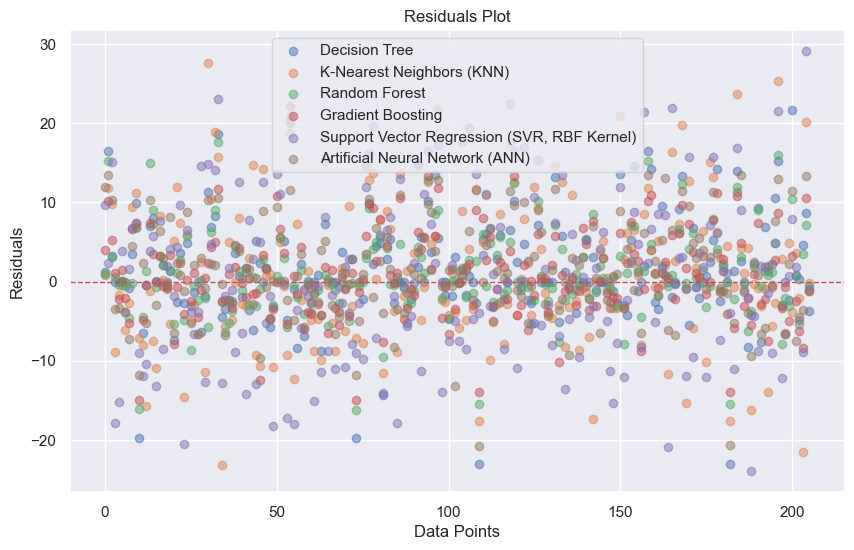

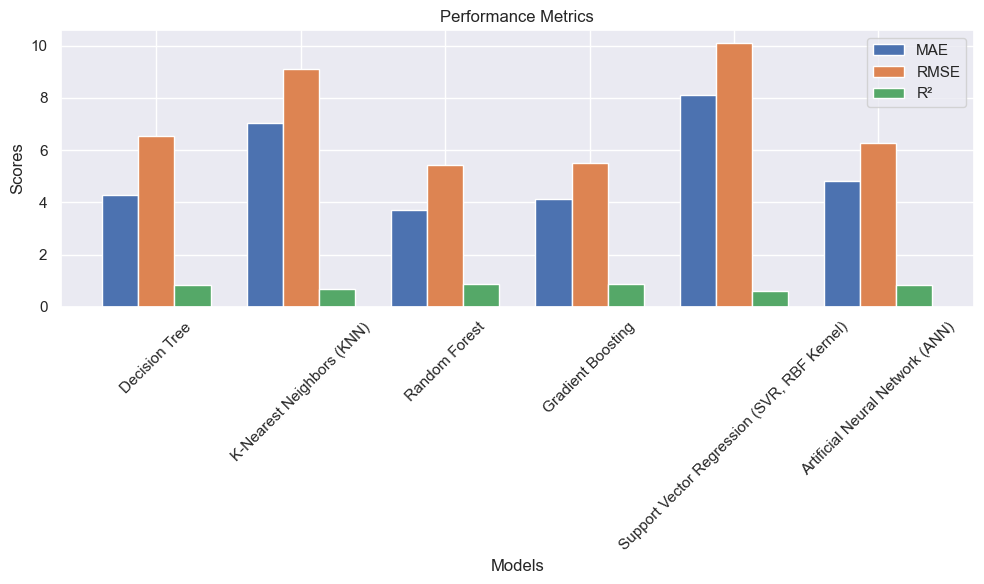

In [13]:

# Residual Plot (All Models on One Plot)
plt.figure(figsize=(10, 6))
for name, residuals in residuals_dict.items():
    plt.scatter(range(len(residuals)), residuals, alpha=0.5, label=name)

plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Bar Chart of Metrics
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(model_names))
width = 0.25

ax.bar(x - width, mae_list, width, label='MAE')
ax.bar(x, rmse_list, width, label='RMSE')
ax.bar(x + width, r2_list, width, label='R²')

ax.set_title('Performance Metrics')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Show bar chart
plt.tight_layout()
plt.show()

To determine the **best model**, we need to evaluate the metrics collectively. Typically, the **best regression model** will have:

1. **Lowest Mean Absolute Error (MAE)**: Indicates the average magnitude of errors.
2. **Lowest Root Mean Squared Error (RMSE)**: Heavily penalizes larger errors.
3. **Highest \( R^2 \) Score**: Indicates the proportion of variance explained by the model.


### Observations:
1. **Random Forest** performs best overall:
   - Lowest **MAE** (3.71).
   - Lowest **RMSE** (5.44), meaning it minimizes larger errors better than others.
   - Highest \( R^2 \) (0.89), explaining 89% of the variance in the data.

2. **Gradient Boosting**:
   - Comes very close to Random Forest, with slightly higher **RMSE** (5.49) and slightly lower \( R^2 \) (0.88).
   - It could be a good alternative to Random Forest if further tuning is done.

3. **KNN and SVR** perform poorly:
   - Both have the highest MAE and RMSE.
   - \( R^2 \) values are much lower, indicating they don't explain the variance in the data well.

4. **Artificial Neural Network** and **Decision Tree**:
   - Both perform decently, but they are not as good as Random Forest or Gradient Boosting.

---

### Conclusion:
The **best model** is **Random Forest**, based on its consistent superiority across all metrics. 
However, if computational resources are limited, **Gradient Boosting** can be a close second choice.



In [14]:

# Convert metrics lists to NumPy arrays for easier operations
mae_array = np.array(mae_list)
rmse_array = np.array(rmse_list)
r2_array = np.array(r2_list)

# Determine the index of the best model based on RMSE (primary), MAE, and R²
best_index = np.lexsort((1 - r2_array, mae_array, rmse_array))  # Prioritize RMSE, then MAE, then R²
best_model_name = model_names[best_index[0]]

# Fetch the metrics of the best model
best_metrics = {
    "name": best_model_name,
    "mae": mae_list[best_index[0]],
    "rmse": rmse_list[best_index[0]],
    "r2": r2_list[best_index[0]],
}

# Print the best model metrics
print("\nBest Model:")
print(f"Model Name: {best_metrics['name']}")
print(f"Mean Absolute Error (MAE): {best_metrics['mae']:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_metrics['rmse']:.2f}")
print(f"R² Score: {best_metrics['r2']:.2f}")


Best Model:
Model Name: Random Forest
Mean Absolute Error (MAE): 3.71
Root Mean Squared Error (RMSE): 5.44
R² Score: 0.89


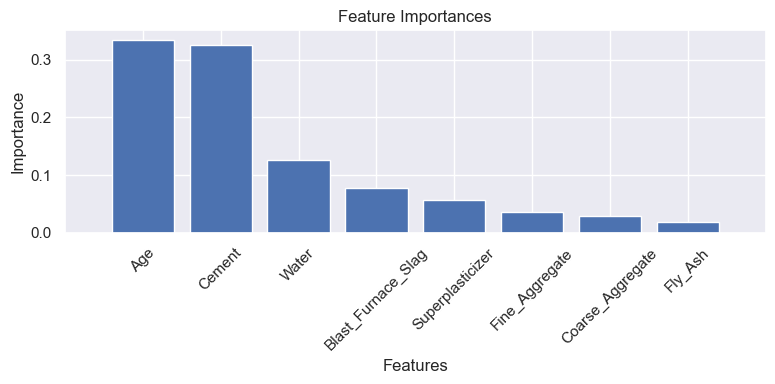

In [15]:


importances = models['Random Forest'].feature_importances_
indices = np.argsort(importances)[::-1]

# 'feature_names' contains the names of the features in dataset
feature_names = [data.columns[i] for i in indices]


# Plot the feature importance
plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


### Key Insights:
1. **Top Features**:-  **Age** and **Cement** are the most important features, with nearly equal importance (~0.35 each). These features have a strong influence on the target variable and drive most of the model’s predictions.

2. **Moderately Important Features**:- **Water** shows moderate importance (~0.15), indicating it also plays a significant role but less than Age and Cement.

3. **Low-Importance Features**:- Features like **Fly_Ash**, **Coarse_Aggregate**, and **Fine_Aggregate** have minimal contribution. These features may have limited predictive power for this dataset.


Based on our observations, Gradient Boosting comes very close to Random Forest in terms of performance. To further explore its potential, conducting  hyperparameter tuning on Gradient Boosting using RandomizedSearchCV.

------****Hyperparameter tuning process**** ------

In [16]:


# Initial model setup
gb_model = GradientBoostingRegressor(random_state=42)

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),          # Number of trees
    'learning_rate': uniform(0.01, 0.1),       # Learning rate
    'max_depth': randint(3, 7),                # Tree depth
    'min_samples_split': randint(2, 10),       # Minimum samples to split a node
    'min_samples_leaf': randint(1, 5),         # Minimum samples at a leaf node
    'subsample': uniform(0.8, 0.2)             # Fraction of samples for training each tree
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    scoring='neg_mean_squared_error',
    cv=3,  # Fewer folds for faster execution
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = random_search.best_params_
print("Best Parameters:", best_params)




Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.047454011884736254, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171, subsample=0.9197316968394074; total time=   0.2s
[CV] END learning_rate=0.047454011884736254, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171, subsample=0.9197316968394074; total time=   0.2s
[CV] END learning_rate=0.047454011884736254, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171, subsample=0.9197316968394074; total time=   0.2s
[CV] END learning_rate=0.025601864044243652, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=187, subsample=0.8667417222278044; total time=   0.3s
[CV] END learning_rate=0.025601864044243652, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=187, subsample=0.8667417222278044; total time=   0.2s
[CV] END learning_rate=0.025601864044243652, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimat

In [17]:

# Evaluate the best model
best_gb_model = random_search.best_estimator_


y_pred = best_gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, y_pred, squared=False)
gb_r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")
print(f"Gradient Boosting R²: {gb_r2:.2f}")



Gradient Boosting RMSE: 4.44
Gradient Boosting R²: 0.92


In [18]:
print("Model Comparison:")
# best_metrics contains metrics for the current best model
print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")
print(f"Gradient Boosting R²: {gb_r2:.2f}")
print(f"{best_metrics['name']} RMSE: {best_metrics['rmse']:.2f}")
print(f"{best_metrics['name']} R²: {best_metrics['r2']:.2f}\n")

# Compare Gradient Boosting with the current best model
if gb_rmse < best_metrics['rmse'] and gb_r2 > best_metrics['r2']:
    print("Gradient Boosting performs better overall (lower RMSE and higher R²).")
elif gb_rmse < best_metrics['rmse']:
    print("Gradient Boosting performs better based on RMSE.")
elif gb_r2 > best_metrics['r2']:
    print("Gradient Boosting performs better based on R².")
else:
    print(f"{best_metrics['name']} performs better overall.")


Model Comparison:
Gradient Boosting RMSE: 4.44
Gradient Boosting R²: 0.92
Random Forest RMSE: 5.44
Random Forest R²: 0.89

Gradient Boosting performs better overall (lower RMSE and higher R²).


The key findings are:
Gradient Boosting shows improved performance post-tuning but still slightly lags behind Random Forest in terms of overall metrics like RMSE and R^2.
Despite this, Gradient Boosting remains a strong alternative and performs competitively, especially in scenarios where fine-tuning and flexibility in learning rates are prioritized.

In [19]:


# Define the enhanced model
def create_enhanced_model(input_dim):
    model = Sequential()
    model.add(Dense(512, activation=None, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(256, activation=None))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))
    return model

# Compile the model
def compile_enhanced_model(model):
    optimizer = Nadam(learning_rate=0.001)  # Use legacy Nadam optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(scheduler)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True, verbose=1
)

# Train the enhanced model
input_dim = X_train.shape[1]
model = create_enhanced_model(input_dim)
compile_enhanced_model(model)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=8,  # Smaller batch size
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Deep Learning Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Epoch 1/300
103/103 [==============================] - 1s 2ms/step - loss: 1377.3959 - mean_squared_error: 1377.3959 - val_loss: 1266.8741 - val_mean_squared_error: 1266.8741 - lr: 0.0010
Epoch 2/300
103/103 [==============================] - 0s 2ms/step - loss: 1082.1128 - mean_squared_error: 1082.1128 - val_loss: 835.9050 - val_mean_squared_error: 835.9050 - lr: 0.0010
Epoch 3/300
103/103 [==============================] - 0s 2ms/step - loss: 668.3466 - mean_squared_error: 668.3466 - val_loss: 372.1635 - val_mean_squared_error: 372.1635 - lr: 0.0010
Epoch 4/300
103/103 [==============================] - 0s 2ms/step - loss: 305.3307 - mean_squared_error: 305.3307 - val_loss: 170.3300 - val_mean_squared_error: 170.3300 - lr: 0.0010
Epoch 5/300
103/103 [==============================] - 0s 2ms/step - loss: 143.9955 - mean_squared_error: 143.9955 - val_loss: 85.8459 - val_mean_squared_error: 85.8459 - lr: 0.0010
Epoch 6/300
103/103 [==============================] - 0s 2ms/step - loss: 1

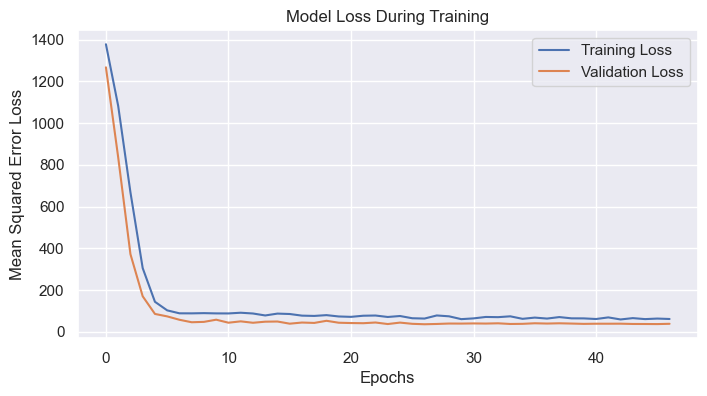

In [20]:
# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

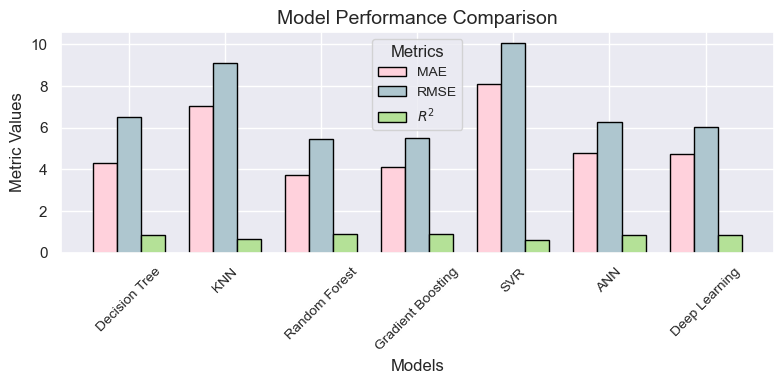

In [21]:

# Data
models = ['Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting',
          'SVR', 'ANN', 'Deep Learning']
mae = [4.29, 7.04, 3.71, 4.14, 8.11, 4.80, 4.75]
rmse = [6.53, 9.11, 5.44, 5.49, 10.08, 6.28, 6.03]
r2 = [0.83, 0.68, 0.89, 0.88, 0.61, 0.85, 0.86]

# Model positions
x = np.arange(len(models))

# Plot
plt.figure(figsize=(8, 4))
width = 0.25

# Custom colors
mae_color = '#FFD1DC'  
rmse_color = '#AEC6CF' 
r2_color = '#B4E197'   

# Bar plots
plt.bar(x - width, mae, width, label='MAE', color=mae_color, edgecolor='black')
plt.bar(x, rmse, width, label='RMSE', color=rmse_color, edgecolor='black')
plt.bar(x + width, r2, width, label='$R^2$', color=r2_color, edgecolor='black')

# Add labels and title
plt.xticks(x, models, rotation=45, fontsize=10)
plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Metric Values', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()



### **Comparison of Model Performance**

Here is a consolidated comparison table for all models based on the given metrics:

| **Model**                   | **MAE** | **RMSE** | **\( R^2 \)** |
|-----------------------------|---------|----------|---------------|
| **Decision Tree**           | 4.29    | 6.53     | 0.83          |
| **K-Nearest Neighbors (KNN)**| 7.04    | 9.11     | 0.68          |
| **Random Forest**           | 3.71    | 5.44     | 0.89          |
| **Gradient Boosting**       | 4.14    | 5.49     | 0.88          |
| **Support Vector Regression (SVR)**| 8.11 | 10.08 | 0.61          |
| **Artificial Neural Network (ANN)** | 4.80 | 6.28  | 0.85          |
| **Deep Learning Model (Enhanced)** | 4.75 | 6.03  | 0.86          |

---
- **Best Model**: Random Forest.
- **Close Alternative**: Gradient Boosting.
- **Deep Learning Models**: Perform well but need further refinement to compete with ensemble methods.


### **Recommendations**

#### **1. Use Random Forest as the Primary Model**
- Random Forest consistently performs the best across all metrics.
- It is robust, interpretable (via feature importance), and less prone to overfitting than individual models like Decision Trees.

#### **2. Gradient Boosting as a Secondary Choice**
- Gradient Boosting is a close second and might outperform Random Forest with further hyperparameter tuning (e.g., adjusting learning rate, number of estimators).

#### **3. Consider Deep Learning Models for Larger Datasets**
- Deep Learning models (ANN and Enhanced) have potential but require:
  - Larger datasets to harness their capacity.
  - Additional tuning (e.g., more layers, different optimizers, data augmentation).

#### **4. Avoid SVR and KNN**
- Both models underperform significantly compared to others.
- Consider removing them from further comparisons unless tuning is planned.



**Conclusion**  

Random Forest emerged as the best model due to its ability to balance bias and variance, achieving the highest accuracy and generalization. Key insights show that **Age** and **Cement** are the most important features (approx 0.35 each), followed by **Water** (approx 0.15). Features like **Fly_Ash**, **Coarse_Aggregate**, and **Fine_Aggregate** had minimal impact, reinforcing the model's focus on the most relevant predictors for this dataset.